In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
#unnamed columns has too much null values
#get information from v2 column

In [9]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [10]:
#rename columns
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.sample(5)

,target,text
1547,ham,Bishan lar nearer... No need buy so early cos ...
836,spam,Do you want 750 anytime any network mins 150 t...
1250,ham,Ummmmmaah Many many happy returns of d day my ...
4232,ham,My love ... I hope your not doing anything dra...
3612,ham,Depends on individual lor e hair dresser say p...


In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
import nltk

In [16]:
#calculating no.of characters
df["num_char"]=df["text"].apply(len)

In [17]:
#calculating no.of words
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
#calculating no.of sentences
df["num_sent"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df.describe()

,target,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [21]:
#only ham messages describe
df[df["target"]==0][["num_char","num_words","num_sent"]].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
#spam messages describe
df[df["target"]==1][["num_char","num_words","num_sent"]].describe()
#here more "sent,words,chars" present in spam than ham

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


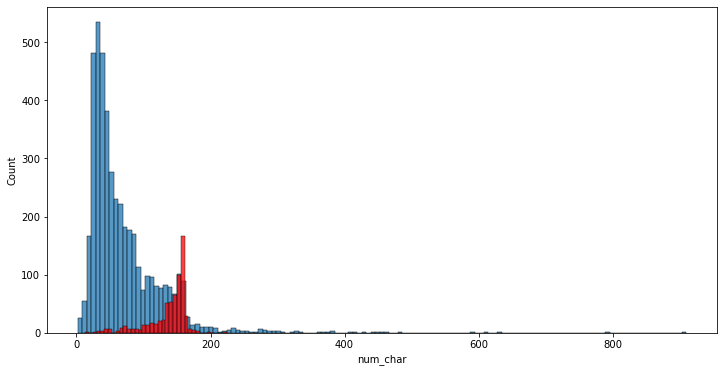

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_char"])
sns.histplot(df[df["target"]==1]["num_char"],color="red")
plt.show()

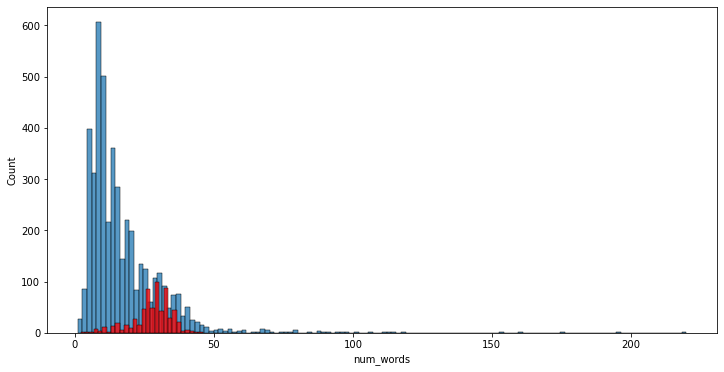

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")
plt.show()

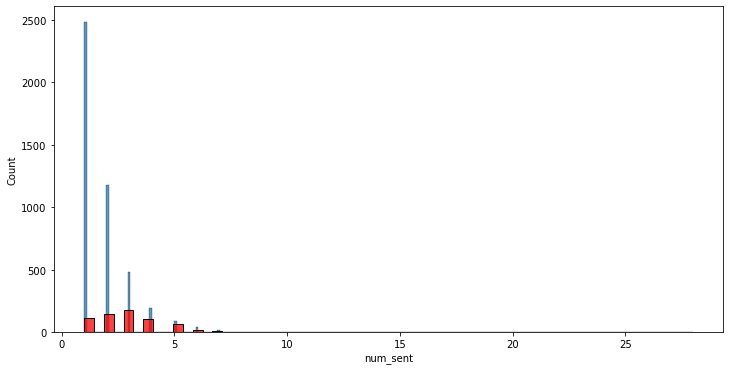

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_sent"])
sns.histplot(df[df["target"]==1]["num_sent"],color="red")
plt.show()
#spam has more data than ham and some outliers are also there

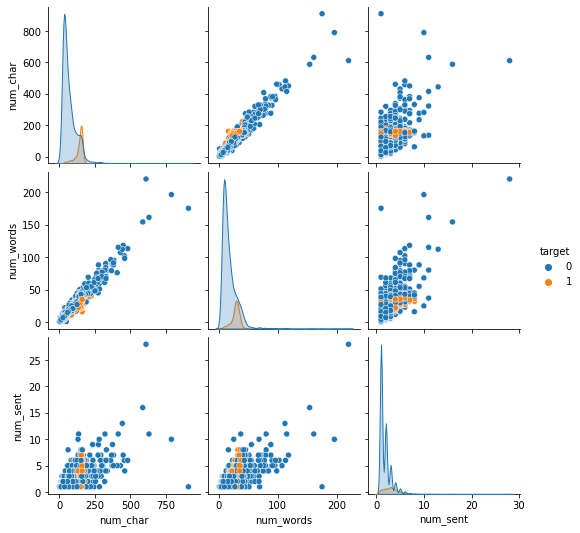

In [26]:
sns.pairplot(df,hue="target")
#som ouliers are there

<AxesSubplot:>

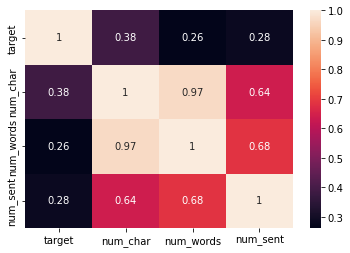

In [27]:
sns.heatmap(df.corr(),annot=True)
#these columns has multicollinearity problem
#keep one column(num_char has more corr with target)

In [28]:
df.drop(columns=["num_words","num_sent"],inplace=True)

## Data Preprocessing

In [29]:
#lower case
#removing special characters(,$$,!",%%,@$.....)
#removing stop words and punctuation(!,?,,,)
#stemming(love,loving,loved are comes under same word)

In [30]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

'love'

In [33]:
def trans_data(data):
    data=data.lower()
    data=nltk.word_tokenize(data)
    
    y=[]
    for i in data:
        if i.isalnum():
            y.append(i)
            
    data=y[:]        
    y.clear()
    
    for i in data:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    data=y[:]        
    y.clear()       
            
    for i in data:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [34]:
df["trans_text"]=df["text"].apply(trans_data)

In [35]:
df.head()

,target,text,num_char,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=4,background_color="pink")

In [37]:
spam_wc=wc.generate(df[df["target"]==1]["trans_text"].str.cat(sep=" "))

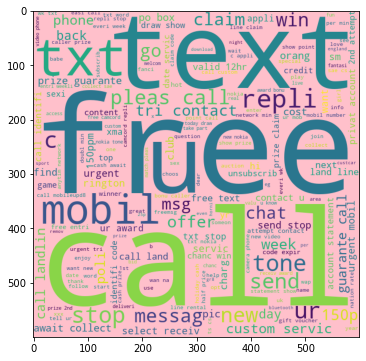

In [38]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [39]:
ham_wc=wc.generate(df[df["target"]==0]["trans_text"].str.cat(sep=" "))

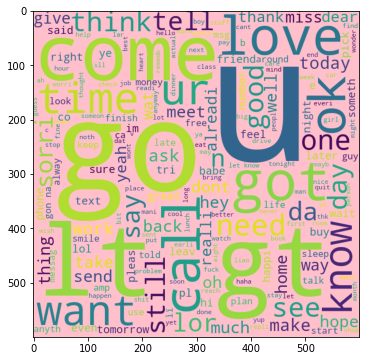

In [40]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [41]:
#list of spam and ham words
spam_words=df[df["target"]==1]["trans_text"].str.cat(sep=" ").split()
ham_words=df[df["target"]==0]["trans_text"].str.cat(sep=" ").split()

In [42]:
from collections import Counter
Counter(spam_words).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [43]:
Counter(ham_words).most_common(50)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106)]

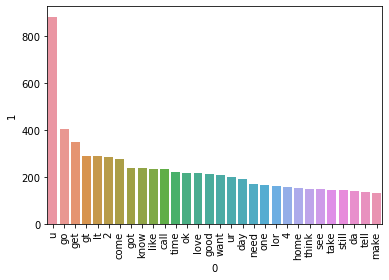

In [44]:
sns.barplot(x=pd.DataFrame(Counter(ham_words).most_common(30))[0],y=pd.DataFrame(Counter(ham_words).most_common(50))[1])
plt.xticks(rotation="vertical")
plt.show()

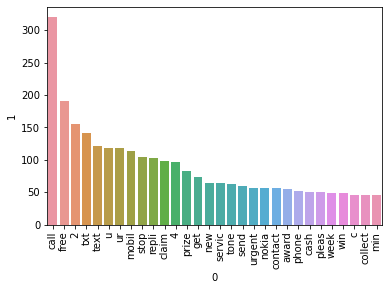

In [45]:
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(30))[0],y=pd.DataFrame(Counter(spam_words).most_common(50))[1])
plt.xticks(rotation="vertical")
plt.show()

## Model Building

In [100]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [102]:
X= tfidf.fit_transform(df['trans_text']).toarray()
#including num_char feature
# X1=tfidf.fit_transform(df['trans_text']).toarray()
# X2=df[["num_char"]].values
# X=np.concatenate((X1,X2),axis=1)

In [103]:
X.shape

(5169, 3000)

In [104]:
y = df['target'].values

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [107]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [108]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [109]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [111]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [113]:
import pickle
pickle.dump(mnb,open("model_sms.pkl","wb"))